# Problem statement
Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



# loading necessary libraries

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore


# loading the dataset

In [163]:
df=pd.read_csv('censusIncome.csv')

In [3]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
df.shape

(32560, 15)

the above dataset contains 32560 rows and 15 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

it can be seen that the dataset does not have any null value

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

the dataset has a mixture of object andint64 data

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

the unique values of object type data has been identified

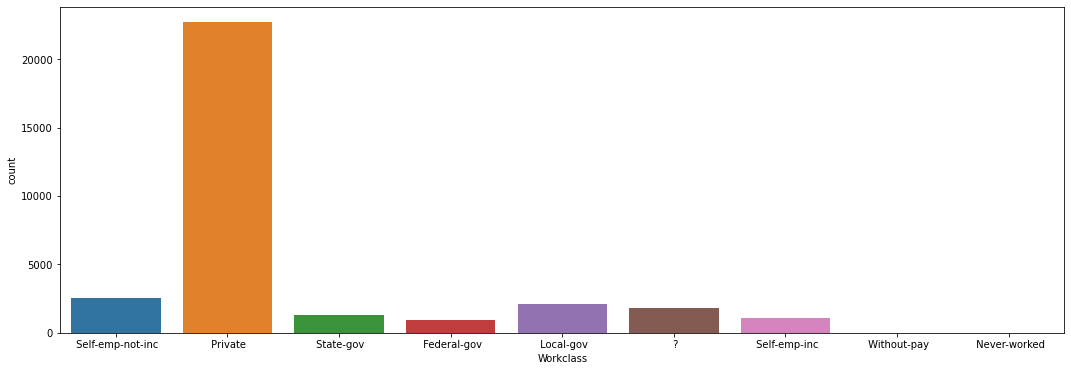

In [12]:
plt.figure(figsize=(18,6))
sns.countplot(df["Workclass"])
plt.show()

from the countplot it can be seen that majority of respondents belong to the workclass private

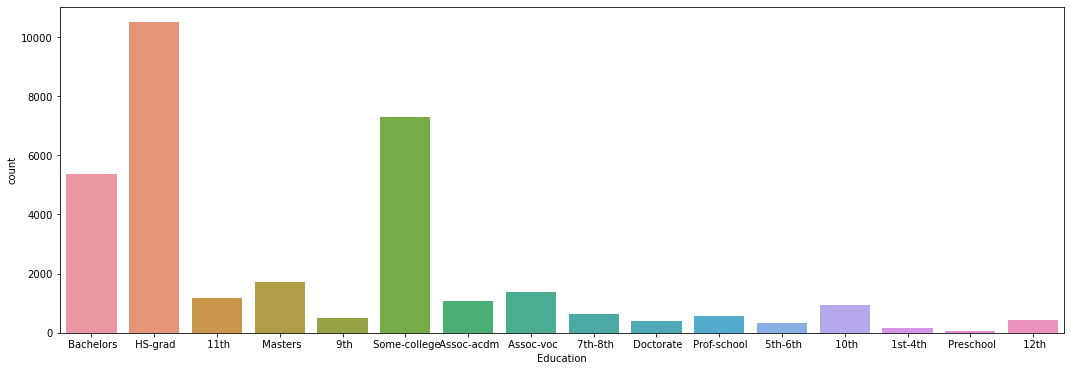

In [13]:
plt.figure(figsize=(18,6))
sns.countplot(df["Education"])
plt.show()

from the countplot it can be seen that majority of respondents are of HS grad. it can be determined that the HS Grad, Bachelors and Some college contribute mostly to the census income

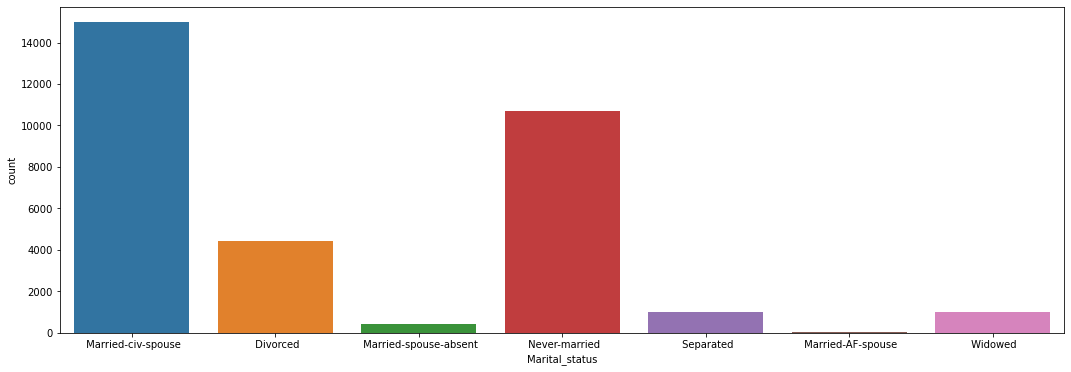

In [14]:
plt.figure(figsize=(18,6))
sns.countplot(df["Marital_status"])
plt.show()

from the countplot it can be seen that majority of respondents have marital status Married civ spouse

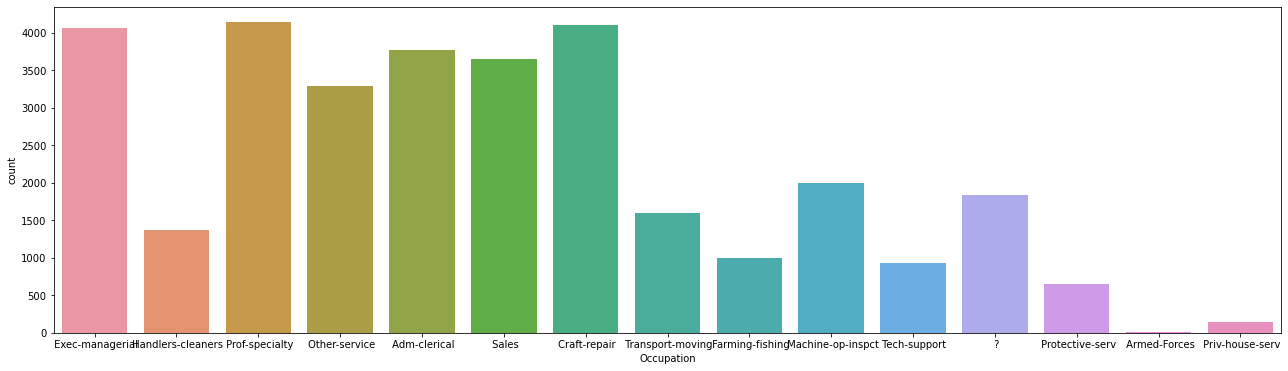

In [21]:
plt.figure(figsize=(22,6))
sns.countplot(df["Occupation"])
plt.show()

majority of the people who have greater contribution to census income are inthe occupation of exec manager, prof speciality,craft repair

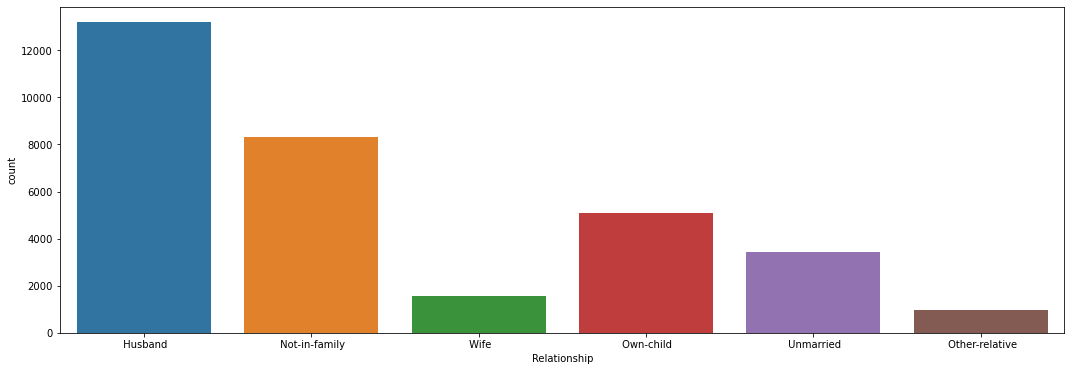

In [16]:
plt.figure(figsize=(18,6))
sns.countplot(df["Relationship"])
plt.show()

majority of respondents have the relationship Husband and the second highest respondents are not in family

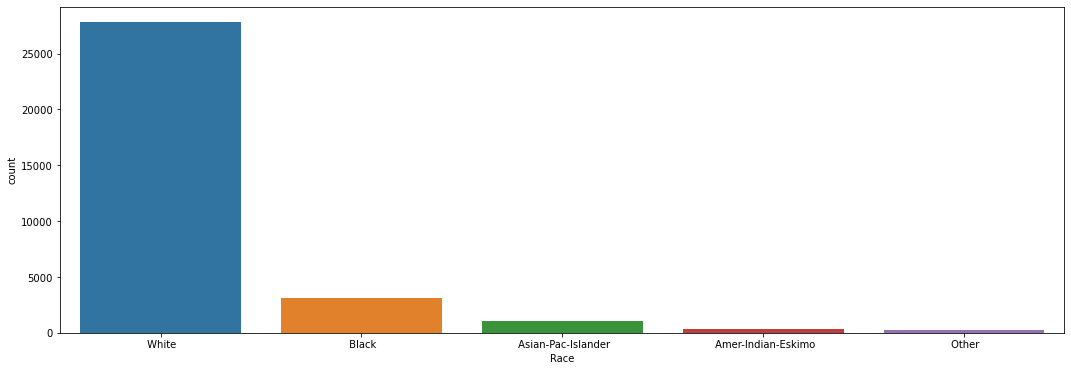

In [17]:
plt.figure(figsize=(18,6))
sns.countplot(df["Race"])
plt.show()

majority of respondents belong to white race

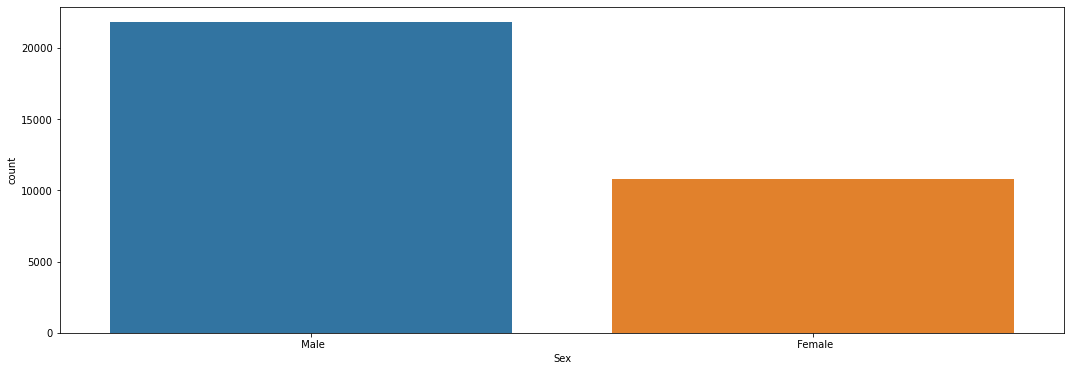

In [18]:
plt.figure(figsize=(18,6))
sns.countplot(df["Sex"])
plt.show()

majority of respondents are male

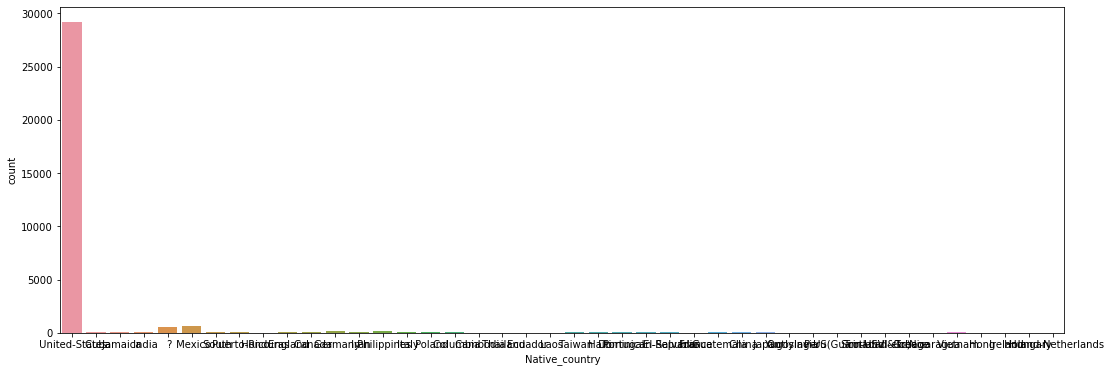

In [19]:
plt.figure(figsize=(18,6))
sns.countplot(df["Native_country"])
plt.show()

majority of respondents are from the country United States

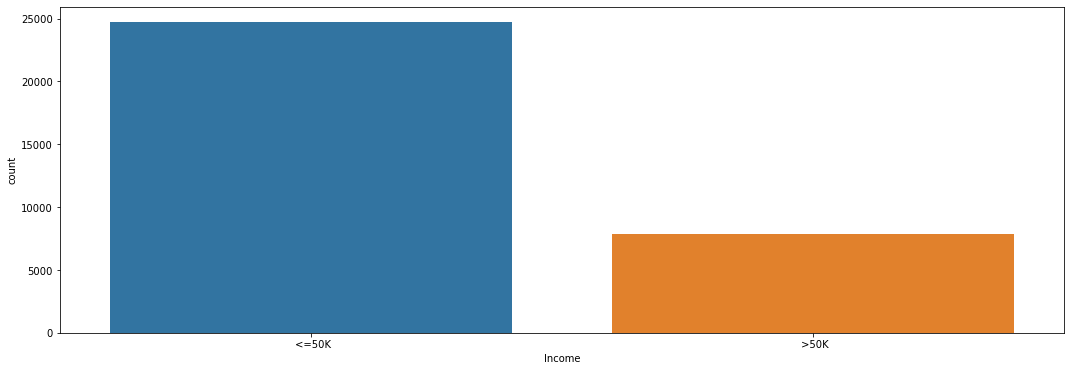

In [20]:
plt.figure(figsize=(18,6))
sns.countplot(df["Income"])
plt.show()

maximum have income less than or equal to 50k

In [22]:
df["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

in the dataset, there is imbalance in the target variable, we need to balance using SMOTE for better accuracy

# Label Encoding

In [164]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [165]:
list=["Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex","Native_country","Income"]
for i in list:
    df[i]=le.fit_transform(df[i])

# descriptive statistics

In [33]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


skewness is present and it can be seen from difference between 75th quartile and max value

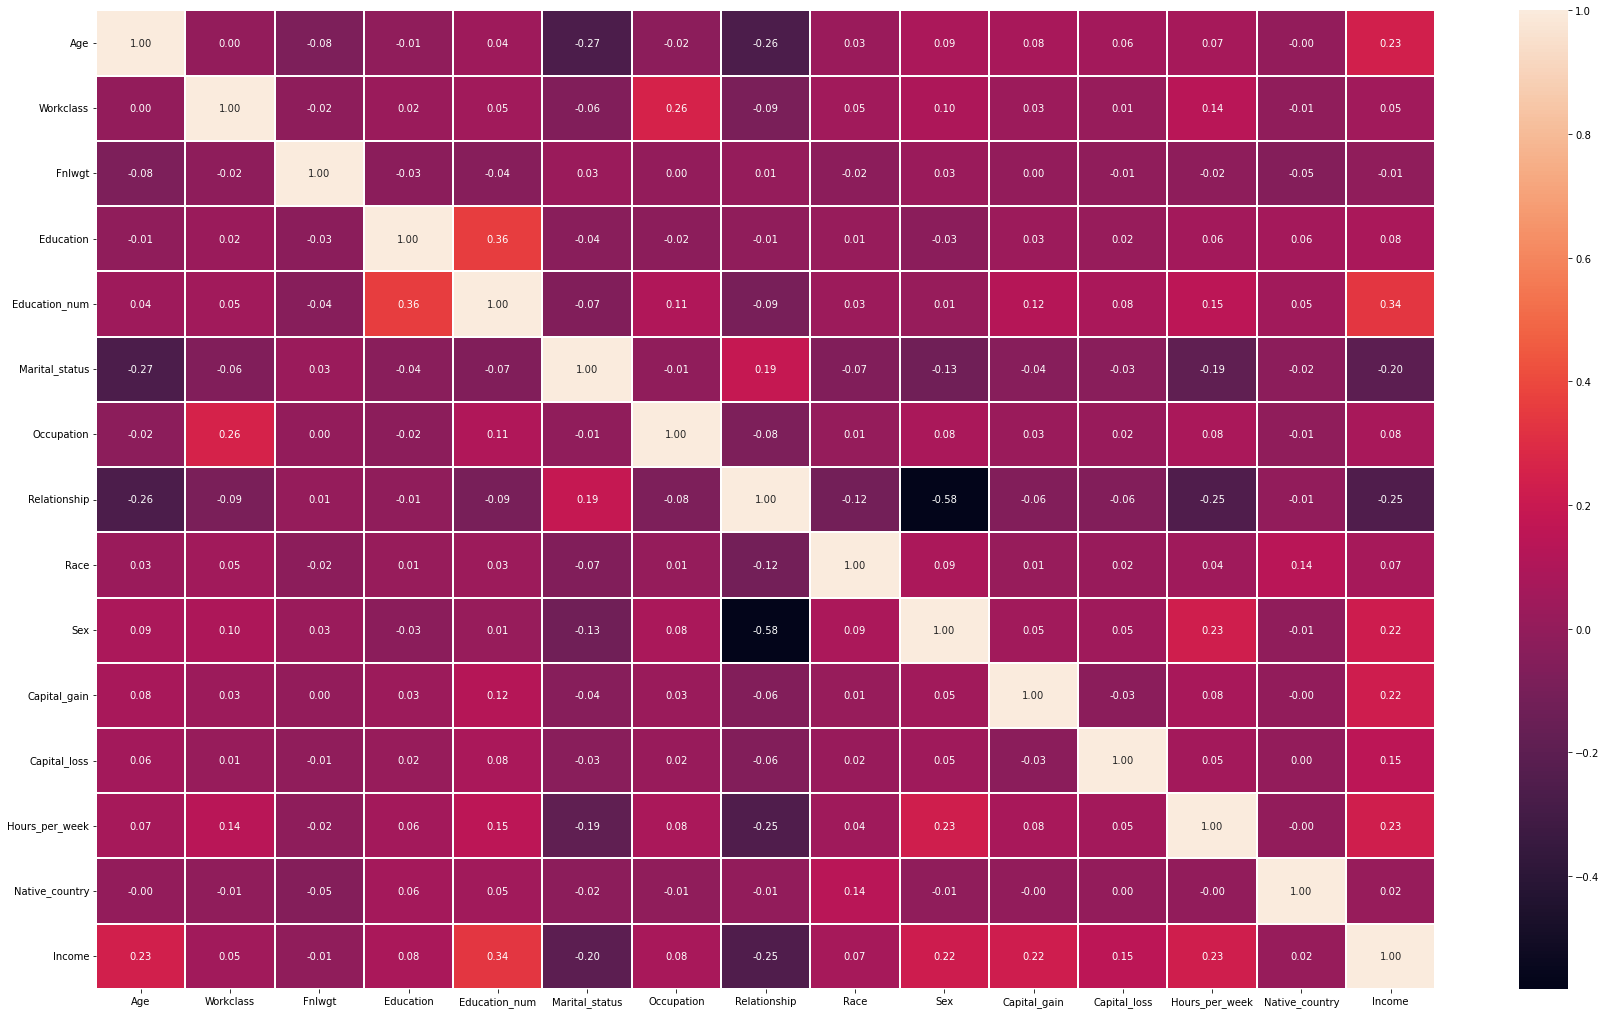

In [35]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

from the heatmap,it is clear that there is no presence of multicollinearity

In [36]:
df.corr()["Income"].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

from the matrix it can be seen that Fnlwgt has only 0.9% correlation with the target variable Income so we can drop it

In [166]:
df.drop(["Fnlwgt"],axis=1,inplace=True)

# Bivariate visualisation of categorical variables

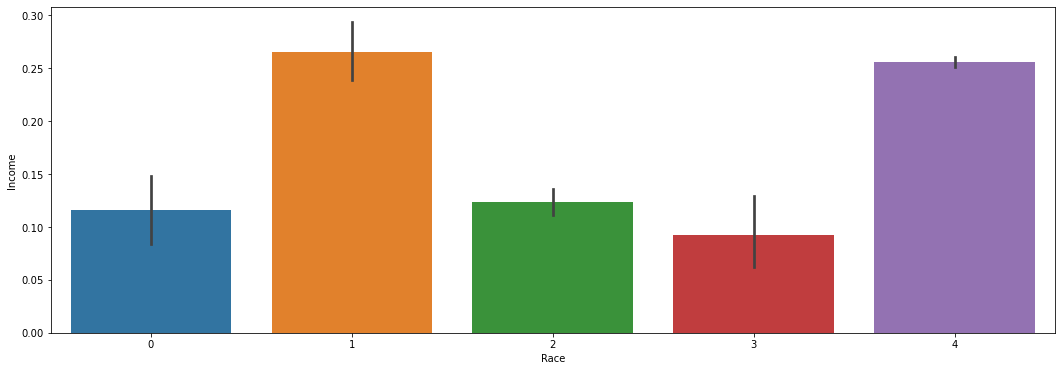

In [32]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Race"],y=df["Income"])
plt.show()

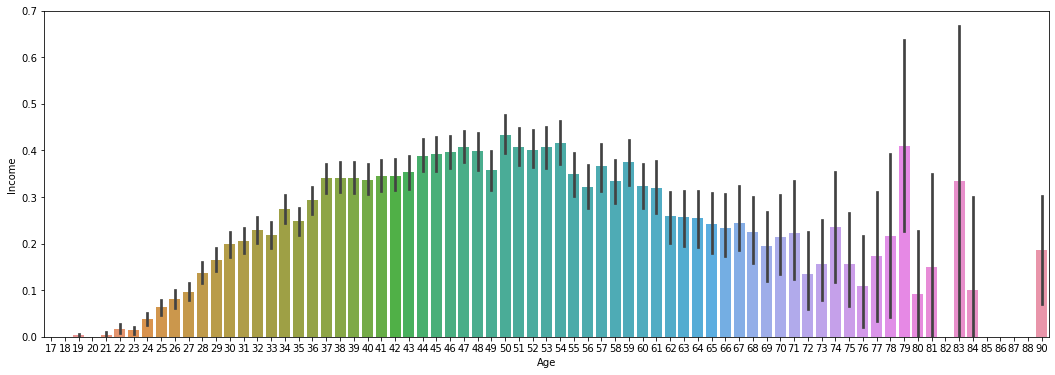

In [49]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Age"],y=df["Income"])
plt.show()

majority of people who contribute to census income belong to age group 27 to 80.

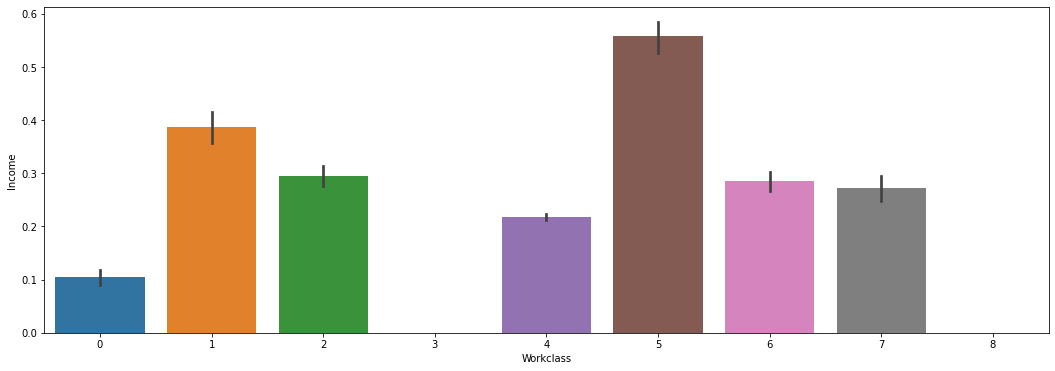

In [50]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Workclass"],y=df["Income"])
plt.show()

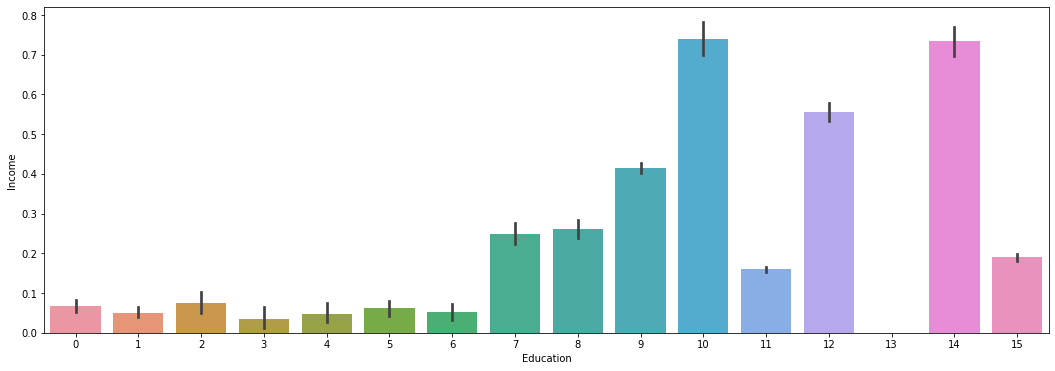

In [51]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Education"],y=df["Income"])
plt.show()

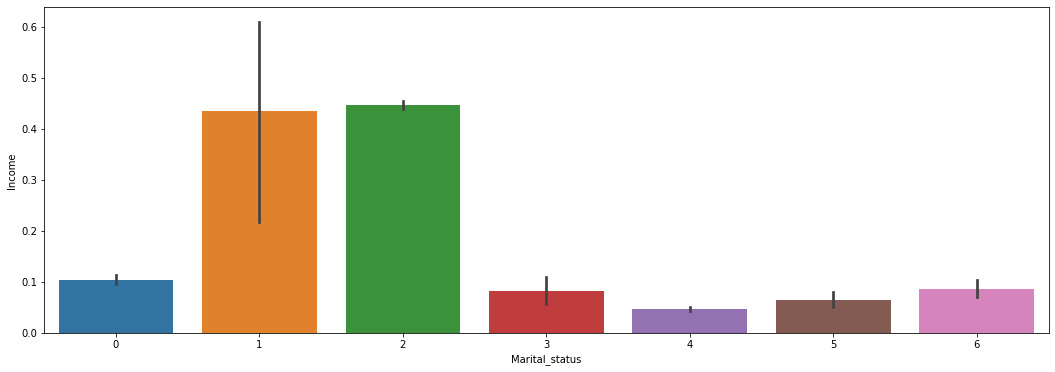

In [52]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Marital_status"],y=df["Income"])
plt.show()

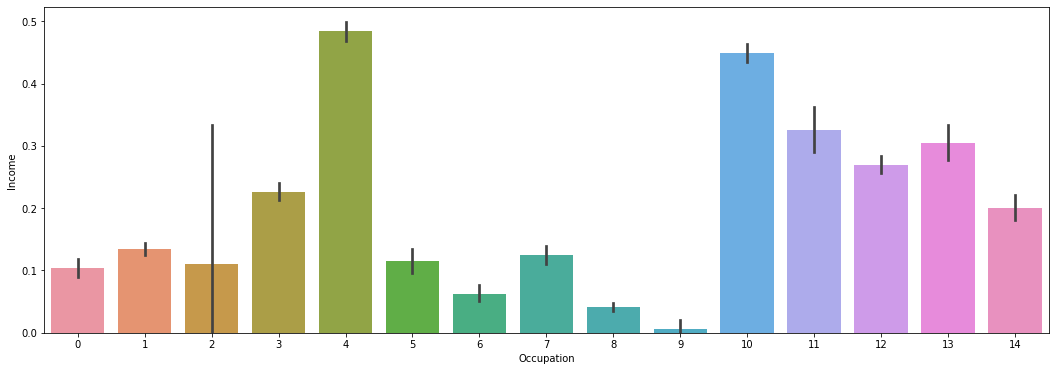

In [53]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Occupation"],y=df["Income"])
plt.show()

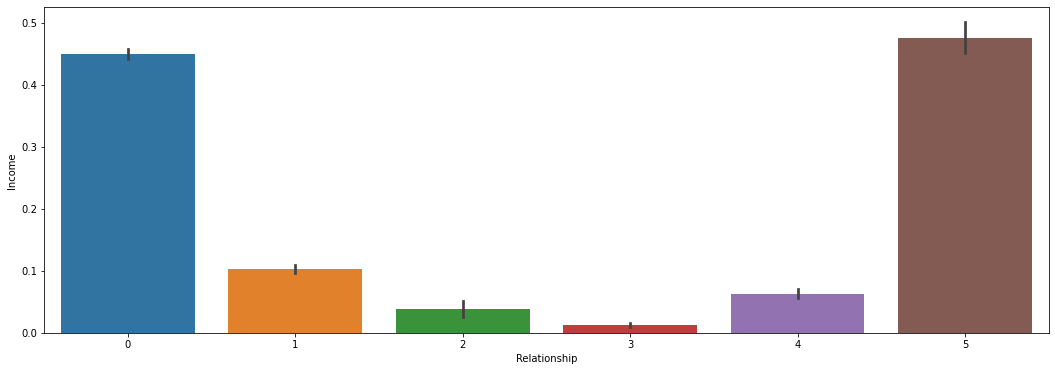

In [54]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Relationship"],y=df["Income"])
plt.show()

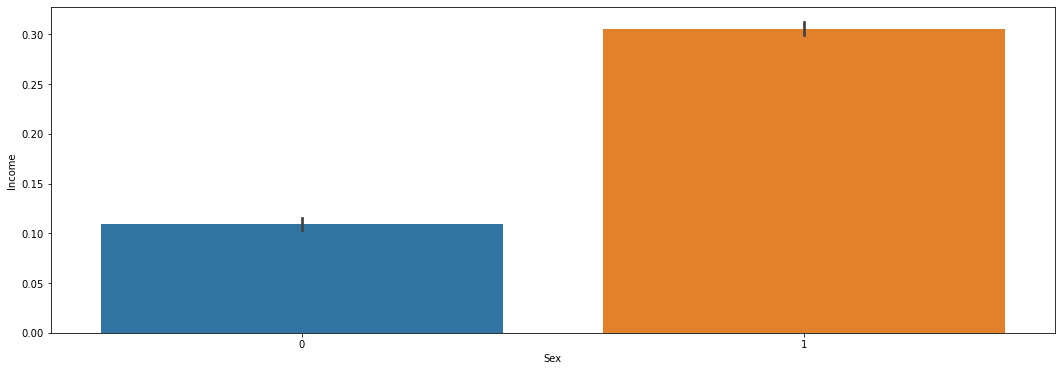

In [55]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Sex"],y=df["Income"])
plt.show()

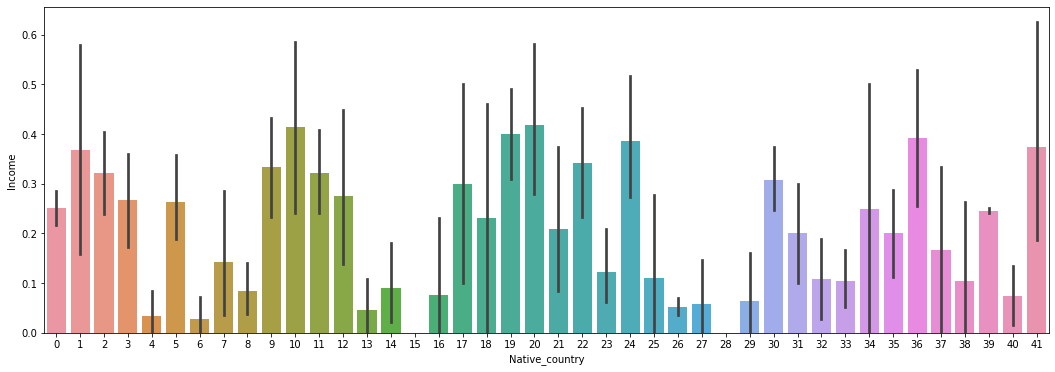

In [45]:
plt.figure(figsize=(18,6))
sns.barplot(x=df["Native_country"],y=df["Income"])
plt.show()

# Univariate analysis

<AxesSubplot:xlabel='Age', ylabel='Density'>

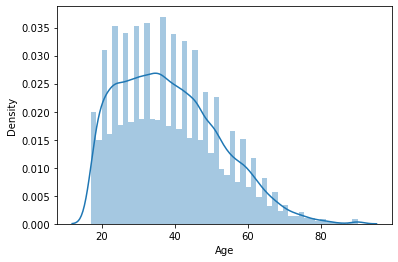

In [38]:
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

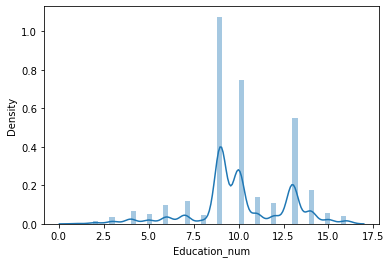

In [39]:
sns.distplot(df["Education_num"])

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

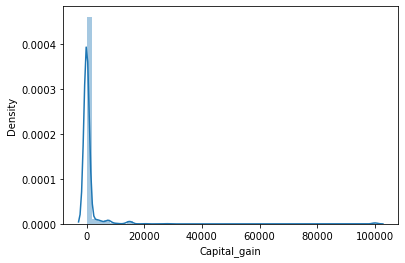

In [40]:
sns.distplot(df["Capital_gain"])

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

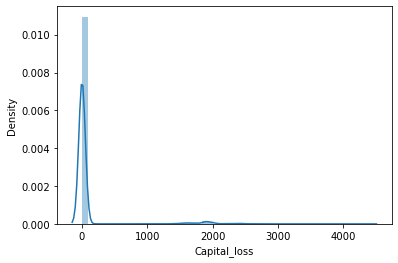

In [41]:
sns.distplot(df["Capital_loss"])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

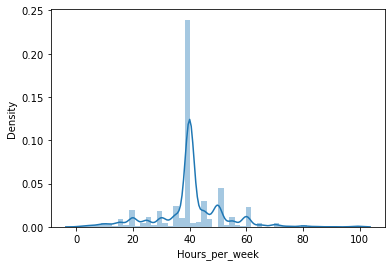

In [42]:
sns.distplot(df["Hours_per_week"])

# Box plot

Age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Workclass         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Education          AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Education_num     AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Marital_status    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Occupation           AxesSubplot(0.125,0.391471;0.133621x0.222059)
Relationship      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Race               AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Sex               AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Capital_gain      AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Capital_loss            AxesSubplot(0.125,0.125;0.133621x0.222059)
Hours_per_week       AxesSubplot(0.285345,0.125;0.133621x0.222059)
Native_country        AxesSubplot(0.44569,0.125;0.133621x0.222059)
Income               AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

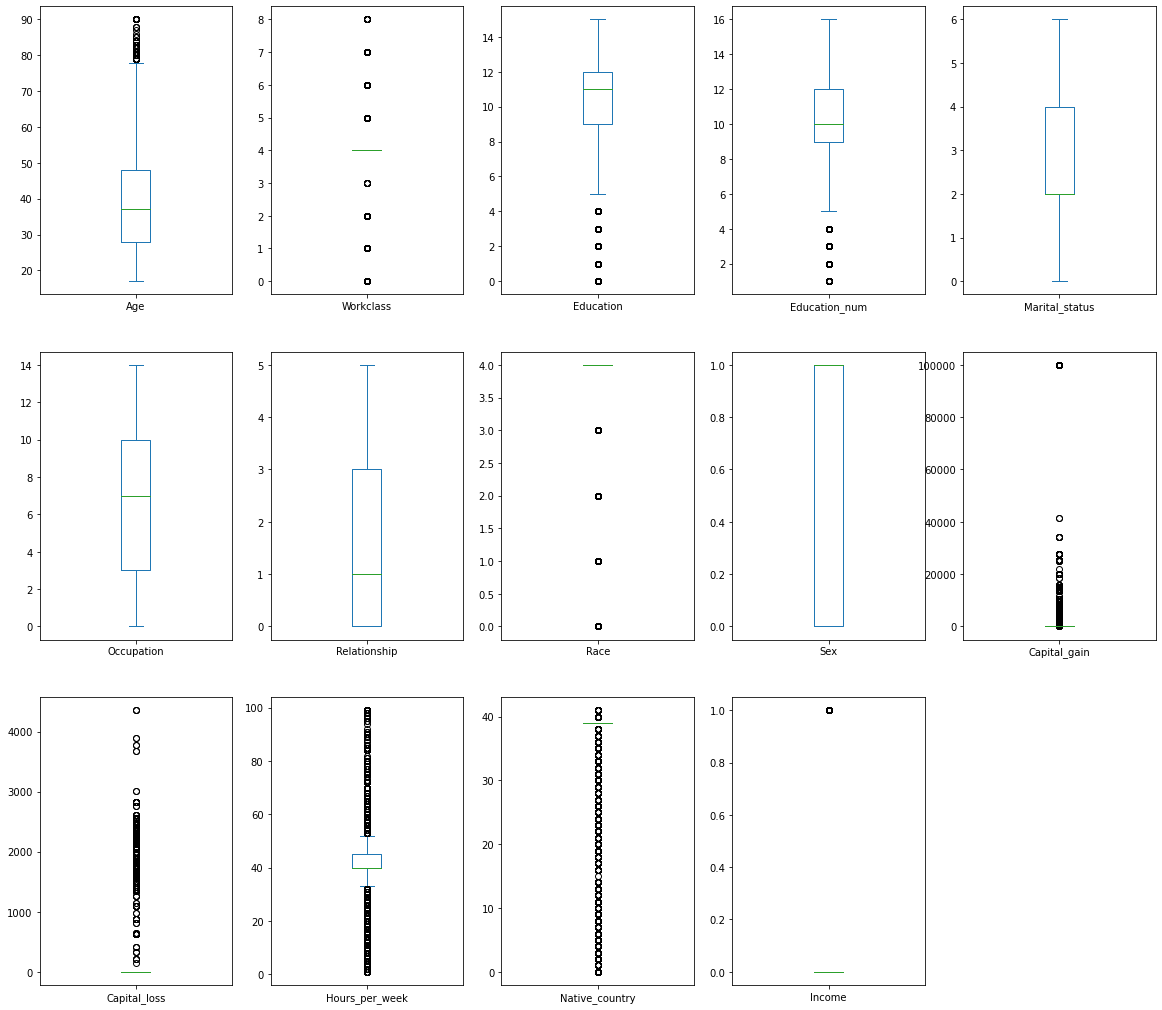

In [58]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(20,18))

outliers are present

# removal of outliers

In [167]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [168]:
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([12, 11,  7, ...,  7,  7,  7], dtype=int64))

In [169]:
dfnew=df[(z<3).all(axis=1)]

In [170]:
dfnew.shape

(27721, 14)

% loss of data=(32560-27721)/32560 * 100=14 %

# Balancing data

In [171]:
from imblearn.over_sampling import SMOTE

In [172]:
smt=SMOTE()

In [173]:
x=dfnew.drop(["Income"],axis=1)
y=dfnew["Income"]

In [186]:
trainx,trainy=smt.fit_resample(x,y)

In [187]:
trainx.shape

(43028, 13)

In [188]:
trainy.shape

(43028,)

# skewness

In [177]:
trainx.skew().sort_values()

Native_country    -6.070333
Race              -2.870563
Sex               -0.975612
Education         -0.948034
Workclass         -0.784767
Hours_per_week    -0.395034
Education_num     -0.219528
Occupation         0.103803
Age                0.299265
Marital_status     0.324383
Relationship       1.168508
Capital_gain       3.312024
Capital_loss      36.060927
dtype: float64

In [189]:
from sklearn.preprocessing import power_transform

In [190]:
dft=trainx

In [191]:
trainx=power_transform(trainx,method='yeo-johnson')

In [192]:
xx=pd.DataFrame(data=trainx,columns=dft.columns)

In [193]:
xx.skew().sort_values()

Race              -2.709101
Sex               -0.964509
Education         -0.197271
Occupation        -0.173116
Age               -0.034117
Education_num     -0.005039
Marital_status     0.002397
Workclass          0.103857
Hours_per_week     0.130654
Relationship       0.396025
Native_country     1.826990
Capital_gain       2.228455
Capital_loss      28.995622
dtype: float64

# standard scaler

In [194]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [195]:
dfx=sc.fit_transform(xx)

In [196]:
dfx.mean()

1.8545927056616913e-18

# application of machine learning models

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [198]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,trainy,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

# KNeighbors Classifier

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
model_selection(knn)

at random state 0,  accuracy score is 0.8521961422263538
at random state 0, confusion matrix is [[5221 1264]
 [ 644 5780]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.89      0.81      0.85      6485
           1       0.82      0.90      0.86      6424

    accuracy                           0.85     12909
   macro avg       0.86      0.85      0.85     12909
weighted avg       0.86      0.85      0.85     12909



at random state 1,  accuracy score is 0.8448369354713765
at random state 1, confusion matrix is [[5147 1321]
 [ 682 5759]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.88      0.80      0.84      6468
           1       0.81      0.89      0.85      6441

    accuracy                           0.84     12909
   macro avg       0.85      0.84      0.84     12909
weighted avg       0.85      0.84      0.84     12909



at rando

at random state 17,  accuracy score is 0.8484003408474707
at random state 17, confusion matrix is [[5140 1223]
 [ 734 5812]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.88      0.81      0.84      6363
           1       0.83      0.89      0.86      6546

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 18,  accuracy score is 0.8392594314044465
at random state 18, confusion matrix is [[5082 1349]
 [ 726 5752]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.88      0.79      0.83      6431
           1       0.81      0.89      0.85      6478

    accuracy                           0.84     12909
   macro avg       0.84      0.84      0.84     12909
weighted avg       0.84      0.84      0.84     12909



at

at random state 34,  accuracy score is 0.8450693314741653
at random state 34, confusion matrix is [[5224 1343]
 [ 657 5685]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.89      0.80      0.84      6567
           1       0.81      0.90      0.85      6342

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.84     12909
weighted avg       0.85      0.85      0.84     12909



at random state 35,  accuracy score is 0.8453017274769541
at random state 35, confusion matrix is [[5205 1234]
 [ 763 5707]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.87      0.81      0.84      6439
           1       0.82      0.88      0.85      6470

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at

at random state 51,  accuracy score is 0.848167944844682
at random state 51, confusion matrix is [[5184 1270]
 [ 690 5765]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.88      0.80      0.84      6454
           1       0.82      0.89      0.85      6455

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 52,  accuracy score is 0.8449918661399024
at random state 52, confusion matrix is [[5146 1305]
 [ 696 5762]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.88      0.80      0.84      6451
           1       0.82      0.89      0.85      6458

    accuracy                           0.84     12909
   macro avg       0.85      0.84      0.84     12909
weighted avg       0.85      0.84      0.84     12909



at 

at random state 68,  accuracy score is 0.8463087768223719
at random state 68, confusion matrix is [[5169 1227]
 [ 757 5756]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.87      0.81      0.84      6396
           1       0.82      0.88      0.85      6513

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 69,  accuracy score is 0.8441397474630103
at random state 69, confusion matrix is [[5157 1320]
 [ 692 5740]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.88      0.80      0.84      6477
           1       0.81      0.89      0.85      6432

    accuracy                           0.84     12909
   macro avg       0.85      0.84      0.84     12909
weighted avg       0.85      0.84      0.84     12909



at

at random state 85,  accuracy score is 0.8461538461538461
at random state 85, confusion matrix is [[5184 1265]
 [ 721 5739]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.88      0.80      0.84      6449
           1       0.82      0.89      0.85      6460

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 86,  accuracy score is 0.8470059648307382
at random state 86, confusion matrix is [[5157 1235]
 [ 740 5777]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.87      0.81      0.84      6392
           1       0.82      0.89      0.85      6517

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at

CV score                    

In [110]:
score=cross_val_score(knn,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81199163 0.83767139 0.85544969 0.8656595  0.85764091]
0.845682623760324
0.01916629475162761


#  DecisionTreeClassifier

In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

at random state 0,  accuracy score is 0.856534200945077
at random state 0, confusion matrix is [[5436 1049]
 [ 803 5621]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.87      0.84      0.85      6485
           1       0.84      0.88      0.86      6424

    accuracy                           0.86     12909
   macro avg       0.86      0.86      0.86     12909
weighted avg       0.86      0.86      0.86     12909



at random state 1,  accuracy score is 0.8532031915717716
at random state 1, confusion matrix is [[5422 1046]
 [ 849 5592]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6468
           1       0.84      0.87      0.86      6441

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random

at random state 17,  accuracy score is 0.8484778061817336
at random state 17, confusion matrix is [[5344 1019]
 [ 937 5609]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.85      0.84      0.85      6363
           1       0.85      0.86      0.85      6546

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 18,  accuracy score is 0.8495623208614145
at random state 18, confusion matrix is [[5351 1080]
 [ 862 5616]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.86      0.83      0.85      6431
           1       0.84      0.87      0.85      6478

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at

at random state 34,  accuracy score is 0.8536679835773492
at random state 34, confusion matrix is [[5528 1039]
 [ 850 5492]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.87      0.84      0.85      6567
           1       0.84      0.87      0.85      6342

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 35,  accuracy score is 0.8497947168642033
at random state 35, confusion matrix is [[5393 1046]
 [ 893 5577]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6439
           1       0.84      0.86      0.85      6470

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at

at random state 52,  accuracy score is 0.8494073901928887
at random state 52, confusion matrix is [[5362 1089]
 [ 855 5603]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.86      0.83      0.85      6451
           1       0.84      0.87      0.85      6458

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 53,  accuracy score is 0.8539003795801379
at random state 53, confusion matrix is [[5433 1095]
 [ 791 5590]]
at random state 53, classification report is               precision    recall  f1-score   support

           0       0.87      0.83      0.85      6528
           1       0.84      0.88      0.86      6381

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at

at random state 70,  accuracy score is 0.8544426369199783
at random state 70, confusion matrix is [[5447 1005]
 [ 874 5583]]
at random state 70, classification report is               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6452
           1       0.85      0.86      0.86      6457

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 71,  accuracy score is 0.857541250290495
at random state 71, confusion matrix is [[5490 1039]
 [ 800 5580]]
at random state 71, classification report is               precision    recall  f1-score   support

           0       0.87      0.84      0.86      6529
           1       0.84      0.87      0.86      6380

    accuracy                           0.86     12909
   macro avg       0.86      0.86      0.86     12909
weighted avg       0.86      0.86      0.86     12909



at 

at random state 88,  accuracy score is 0.8513440235494616
at random state 88, confusion matrix is [[5286 1060]
 [ 859 5704]]
at random state 88, classification report is               precision    recall  f1-score   support

           0       0.86      0.83      0.85      6346
           1       0.84      0.87      0.86      6563

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at random state 89,  accuracy score is 0.8532031915717716
at random state 89, confusion matrix is [[5395  996]
 [ 899 5619]]
at random state 89, classification report is               precision    recall  f1-score   support

           0       0.86      0.84      0.85      6391
           1       0.85      0.86      0.86      6518

    accuracy                           0.85     12909
   macro avg       0.85      0.85      0.85     12909
weighted avg       0.85      0.85      0.85     12909



at

CV Score

In [112]:
score=cross_val_score(dtc,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81791773 0.84615385 0.87334418 0.87623475 0.87042417]
0.8568149351363987
0.02219102323009699


# RandomForestClassifier

In [199]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.8872879386474553
at random state 0, confusion matrix is [[5636  849]
 [ 606 5818]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.90      0.87      0.89      6485
           1       0.87      0.91      0.89      6424

    accuracy                           0.89     12909
   macro avg       0.89      0.89      0.89     12909
weighted avg       0.89      0.89      0.89     12909



at random state 1,  accuracy score is 0.8793090092183747
at random state 1, confusion matrix is [[5523  945]
 [ 613 5828]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.90      0.85      0.88      6468
           1       0.86      0.90      0.88      6441

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at rando

at random state 17,  accuracy score is 0.883801998605624
at random state 17, confusion matrix is [[5495  868]
 [ 632 5914]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6363
           1       0.87      0.90      0.89      6546

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at random state 18,  accuracy score is 0.8807033852351073
at random state 18, confusion matrix is [[5467  964]
 [ 576 5902]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.90      0.85      0.88      6431
           1       0.86      0.91      0.88      6478

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at 

at random state 34,  accuracy score is 0.8858935626307227
at random state 34, confusion matrix is [[5667  900]
 [ 573 5769]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.91      0.86      0.88      6567
           1       0.87      0.91      0.89      6342

    accuracy                           0.89     12909
   macro avg       0.89      0.89      0.89     12909
weighted avg       0.89      0.89      0.89     12909



at random state 35,  accuracy score is 0.881942830583314
at random state 35, confusion matrix is [[5560  879]
 [ 645 5825]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6439
           1       0.87      0.90      0.88      6470

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at 

at random state 51,  accuracy score is 0.8831822759315207
at random state 51, confusion matrix is [[5551  903]
 [ 605 5850]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6454
           1       0.87      0.91      0.89      6455

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at random state 52,  accuracy score is 0.8823301572546286
at random state 52, confusion matrix is [[5539  912]
 [ 607 5851]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6451
           1       0.87      0.91      0.89      6458

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at

at random state 68,  accuracy score is 0.8872104733131924
at random state 68, confusion matrix is [[5538  858]
 [ 598 5915]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.90      0.87      0.88      6396
           1       0.87      0.91      0.89      6513

    accuracy                           0.89     12909
   macro avg       0.89      0.89      0.89     12909
weighted avg       0.89      0.89      0.89     12909



at random state 69,  accuracy score is 0.8811681772406847
at random state 69, confusion matrix is [[5581  896]
 [ 638 5794]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6477
           1       0.87      0.90      0.88      6432

    accuracy                           0.88     12909
   macro avg       0.88      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at

at random state 85,  accuracy score is 0.8846541172825161
at random state 85, confusion matrix is [[5556  893]
 [ 596 5864]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6449
           1       0.87      0.91      0.89      6460

    accuracy                           0.88     12909
   macro avg       0.89      0.88      0.88     12909
weighted avg       0.89      0.88      0.88     12909



at random state 86,  accuracy score is 0.8843442559454644
at random state 86, confusion matrix is [[5510  882]
 [ 611 5906]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6392
           1       0.87      0.91      0.89      6517

    accuracy                           0.88     12909
   macro avg       0.89      0.88      0.88     12909
weighted avg       0.88      0.88      0.88     12909



at

CV score

In [114]:
score=cross_val_score(rf,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.83906577 0.87299558 0.90309087 0.90598489 0.9070308 ]
0.8856335815869987
0.026476607327709043


# Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.798435200247889
at random state 0, confusion matrix is [[5009 1476]
 [1126 5298]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.82      0.77      0.79      6485
           1       0.78      0.82      0.80      6424

    accuracy                           0.80     12909
   macro avg       0.80      0.80      0.80     12909
weighted avg       0.80      0.80      0.80     12909



at random state 1,  accuracy score is 0.7869703307769773
at random state 1, confusion matrix is [[4890 1578]
 [1172 5269]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.81      0.76      0.78      6468
           1       0.77      0.82      0.79      6441

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random

at random state 18,  accuracy score is 0.7857308854287707
at random state 18, confusion matrix is [[4854 1577]
 [1189 5289]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.80      0.75      0.78      6431
           1       0.77      0.82      0.79      6478

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random state 19,  accuracy score is 0.7903013401502827
at random state 19, confusion matrix is [[4983 1556]
 [1151 5219]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.81      0.76      0.79      6539
           1       0.77      0.82      0.79      6370

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at

at random state 35,  accuracy score is 0.7903013401502827
at random state 35, confusion matrix is [[4942 1497]
 [1210 5260]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.80      0.77      0.79      6439
           1       0.78      0.81      0.80      6470

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random state 36,  accuracy score is 0.7914633201642265
at random state 36, confusion matrix is [[4875 1609]
 [1083 5342]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.82      0.75      0.78      6484
           1       0.77      0.83      0.80      6425

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at

at random state 53,  accuracy score is 0.785421024091719
at random state 53, confusion matrix is [[4873 1655]
 [1115 5266]]
at random state 53, classification report is               precision    recall  f1-score   support

           0       0.81      0.75      0.78      6528
           1       0.76      0.83      0.79      6381

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random state 54,  accuracy score is 0.7908435974901231
at random state 54, confusion matrix is [[4958 1551]
 [1149 5251]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.81      0.76      0.79      6509
           1       0.77      0.82      0.80      6400

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at 

at random state 71,  accuracy score is 0.7887520334650244
at random state 71, confusion matrix is [[4966 1563]
 [1164 5216]]
at random state 71, classification report is               precision    recall  f1-score   support

           0       0.81      0.76      0.78      6529
           1       0.77      0.82      0.79      6380

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random state 72,  accuracy score is 0.7888294987992873
at random state 72, confusion matrix is [[4875 1542]
 [1184 5308]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.80      0.76      0.78      6417
           1       0.77      0.82      0.80      6492

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at

at random state 88,  accuracy score is 0.786273142768611
at random state 88, confusion matrix is [[4790 1556]
 [1203 5360]]
at random state 88, classification report is               precision    recall  f1-score   support

           0       0.80      0.75      0.78      6346
           1       0.78      0.82      0.80      6563

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at random state 89,  accuracy score is 0.7910759934929119
at random state 89, confusion matrix is [[4924 1467]
 [1230 5288]]
at random state 89, classification report is               precision    recall  f1-score   support

           0       0.80      0.77      0.79      6391
           1       0.78      0.81      0.80      6518

    accuracy                           0.79     12909
   macro avg       0.79      0.79      0.79     12909
weighted avg       0.79      0.79      0.79     12909



at 

CV Score

In [117]:
score=cross_val_score(lg,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.76806879 0.78747386 0.7906112  0.79302731 0.80151075]
0.7881383810843428
0.011064057254003471


in random forest classifier model, there is highest accuracy and least difference with the CV score. thus it is the best fit model

# Grid search cv for hyper parameter tuning

In [118]:
from sklearn.model_selection import GridSearchCV

In [139]:
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[20,21,22],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200]}

In [140]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=5)

In [141]:
gd.fit(dfx,trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [16, 18, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [142]:
gd.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 100}

In [143]:
gd.best_score_

0.8827283965904631

# building the final model

In [200]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(dfx,trainy,random_state=47,test_size=0.30)
rf=RandomForestClassifier(max_features='log2',max_depth=20,criterion="gini",n_estimators=100)

rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")
    

Accuracy score:-- 0.8848090479510419
Confusion matrix:-- [[5399 1076]
 [ 411 6023]]
classification report:--               precision    recall  f1-score   support

           0       0.93      0.83      0.88      6475
           1       0.85      0.94      0.89      6434

    accuracy                           0.88     12909
   macro avg       0.89      0.88      0.88     12909
weighted avg       0.89      0.88      0.88     12909





# AUCROC score

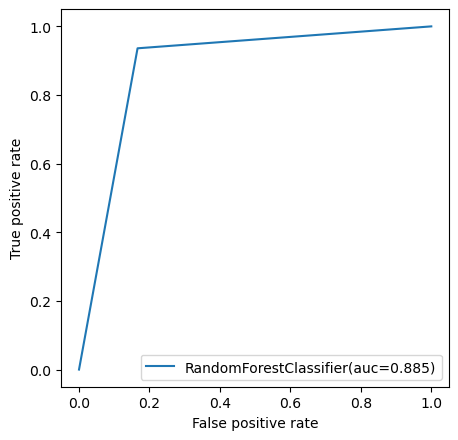

In [202]:
from sklearn.metrics import roc_curve,auc

fpr,tpr,threshold=roc_curve(y_test,pred)
auc=auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label='RandomForestClassifier(auc=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

auc score is 88.5%

# prediction

In [150]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred})

In [151]:
dfpred.sample(40)

,Expected,Predicted
17677,0,0
4800,0,0
29467,1,1
2927,0,0
11232,0,0
40189,1,1
35700,1,1
24234,0,0
19616,0,0
16975,0,0


# saving the model

In [160]:
import pickle
filename="census_income.pkl"
pickle.dump(rf,open(filename,'wb'))

# conclusion

the model performs with an accuracy score of more than 88%. 